# Patches visualization

In order to understand the patch selection strategy, let's plot the shape and valid patches centers for a given project.

In [1]:
%load_ext autoreload
%autoreload 2
import blowtorch
from src.scripts.create_dataset import DatasetCreator

In [2]:
run = blowtorch.run.Run(config_files=["config/prepare_dataset-dev.yaml"])

In [10]:
dataset = DatasetCreator(run)

In [76]:
# import geopandas as gpd
# import pandas as pd
# from shapely.geometry import Point    

In [84]:
# df0 = gpd.GeoDataFrame()
# df1 = gpd.GeoDataFrame({
#     "index": ["(0,0)", "(1,2)"],
#     "geometry": [Point(0,0), Point(1,2)],
#     "split": [1, 2],
#     "kv_id": [346, 346]
# }, crs="EPSG:32632")
# df2 = gpd.GeoDataFrame({
#     "index": ["(5,6)", "(8,10)"],
#     "geometry": [Point(5,6), Point(8,10)],
#     "split": [1, 2],
#     "kv_id": [40, 40]
# }, crs="EPSG:32632")
# df = pd.concat([df0, df1, df2])

In [ ]:
# # Polygon CRS = CRS.from_epsg(32632)
# crs?

Type:           CRS
String form:    EPSG:32632
Length:         1
File:           /scratch/ewalt/miniconda3/envs/bfs/lib/python3.8/site-packages/fiona/crs.cpython-38-x86_64-linux-gnu.so
Docstring:     
CRS(initialdata=None, **kwargs)
A geographic or projected coordinate reference system.

    .. versionadded:: 1.9.0

    CRS objects may be created by passing PROJ parameters as keyword
    arguments to the standard constructor or by passing EPSG codes, PROJ
    mappings, PROJ strings, or WKT strings to the from_epsg, from_dict,
    from_string, or from_wkt static methods.

    Examples
    --------

    The from_dict method takes PROJ parameters as keyword arguments.

    >>> crs = CRS.from_dict(proj="aea")

    EPSG codes may be used with the from_epsg method.

    >>> crs = CRS.from_epsg(3005)

    The from_string method takes a variety of input.

    >>> crs = CRS.from_string("EPSG:3005")

    
Init docstring:
Make a CRS from a PROJ dict or mapping.

Parameters
----------
initialdata 

In [36]:
import os
import fiona        stats["pkl"] = path
    def __init__(self, run):
        self.run = run
self = Self(run)
project_id = self.run["projects"][0]
gt_file_path = os.path.join(self.run["gt_dir"], project+".tif")
gt_file = rasterio.open(gt_file_path)

project_shape_collections = [fiona.open(p) for p in self.run['project_shapefiles']]
# create the shape ("polygon") associated to the project 
polygon, crs, gt_date = None, None, None
for collection in project_shape_collections:
    try:
        polygon = [s['geometry'] for s in collection if s['properties']['kv_id'] == int(project_id)][0]
        crs = collection.crs
        gt_date = [s["properties"]["PUB_DATO"] for s in collection if s['properties']['kv_id'] == int(project_id)][0]
        break
    except IndexError: pass 
if polygon is None: print("No polygon found")
polygon = rasterio.warp.transform_geom(src_crs=crs, dst_crs=gt_file.crs, geom=polygon)
polygon["crs"] = gt_file.crs
polygon["original_crs"] = crs
rasterized_polygon = rasterized_polygon = rasterio.features.rasterize(
    [(polygon, 1)],
    out_shape=gt_file.shape,
    transform=gt_file.transform,
    fill=0,
    dtype='uint8'
)

In [19]:
type(rasterized_polygon), type(polygon)

(numpy.ndarray, dict)

In [24]:
len(polygon["coordinates"][0])

1293

In [29]:
rasterized_polygon.shape[0]*rasterized_polygon.shape[1], rasterized_polygon.shape, gt_file.shape

(3961823, (2071, 1913), (2071, 1913))

In [31]:
transform, w, h = rasterio.warp.calculate_default_transform(
    polygon["crs"],
    polygon["original_crs"],
    rasterized_polygon.shape[1],
    rasterized_polygon.shape[0]
)

ValueError: Either four bounding values, ground control points, or rational polynomial coefficients must be specified

In [30]:
gt_file

<open DatasetReader name='data/preprocessed/827.tif' mode='r'>

In [35]:
np.unique(rasterized_polygon)

array([0, 1], dtype=uint8)

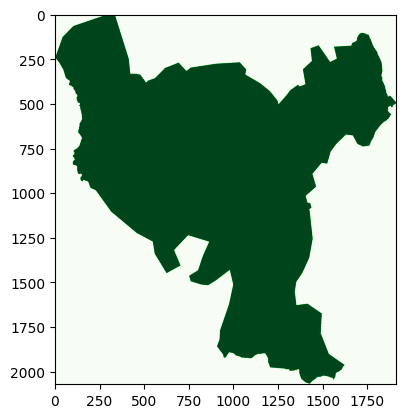

In [39]:
plt.imshow(rasterized_polygon, cmap="Greens")

In [41]:
collection

<open Collection 'data/NHM_projectDekning_AOI_edit2015_V2.shp:NHM_projectDekning_AOI_edit2015_V2', mode 'r' at 0x7f9d8d5434f0>

In [42]:
collection?

Type:           Collection
String form:    <open Collection 'data/NHM_projectDekning_AOI_edit2015_V2.shp:NHM_projectDekning_AOI_edit2015_V2', mode 'r' at 0x7f9d8d5434f0>
Length:         44
File:           /scratch/ewalt/miniconda3/envs/bfs/lib/python3.8/site-packages/fiona/collection.py
Docstring:     
A file-like interface to features of a vector dataset

Python text file objects are iterators over lines of a file. Fiona
Collections are similar iterators (not lists!) over features
represented as GeoJSON-like mappings.
Init docstring:
The required ``path`` is the absolute or relative path to
a file, such as '/data/test_uk.shp'. In ``mode`` 'r', data can
be read only. In ``mode`` 'a', data can be appended to a file.
In ``mode`` 'w', data overwrites the existing contents of
a file.

In ``mode`` 'w', an OGR ``driver`` name and a ``schema`` are
required. A Proj4 ``crs`` string is recommended. If both ``crs``
and ``crs_wkt`` keyword arguments are passed, the latter will
trump the former.

I

In [45]:
gt_file.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 1913, 'height': 2071, 'count': 5, 'crs': CRS.from_epsg(25832), 'transform': Affine(10.0, 0.0, 589875.6051443298,
       0.0, -10.0, 6652337.033205436), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}

## Raster cell to coordinates

Strategy:
- Save raster as a geotiff using `gt_file` updated profile
- 

In [51]:
with rasterio.Env():
    profile = gt_file.profile
    profile.update(
        driver='GTiff',
        count=1,
        compress='deflate',
        nodata=None,
        dtype='uint8'
    )
    with rasterio.open("rasterized_polygon.test.tif", "w", **profile) as f:
        f.write(rasterized_polygon.reshape(1,rasterized_polygon.shape[0],-1))

In [48]:
rasterized_polygon.shape

(2071, 1913)

In [60]:
point = next(rasterio.features.shapes(np.array([[0,1]], dtype=np.uint8)))

({'type': 'Polygon',
  'coordinates': [[(0.0, 0.0),
    (0.0, 1.0),
    (1.0, 1.0),
    (1.0, 0.0),
    (0.0, 0.0)]]},
 0.0)

In [72]:
x = np.expand_dims(np.random.randn(100,120), 0)
print(x.shape)
y = np.random.randn(5, 100,120)
x = np.concatenate([x,y], axis=0)
x.shape

(1, 100, 120)


(6, 100, 120)

In [62]:
x.shape

(2, 100, 120)